In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X=df[['LSTAT']].values

In [4]:
y=boston_data.target

In [16]:
print(min(y))
print(max(y))
print(min(X))
print(max(X))

5.0
50.0
[1.73]
[37.97]


# Without preprocessing

In [9]:
alpha = 0.0001
w_=np.zeros(1+X.shape[1])
cost_=[]
n_=100
for i in range(n_):
    y_pred=np.dot(X,w_[1:])+w_[0]
    errors=(y-y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha *errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

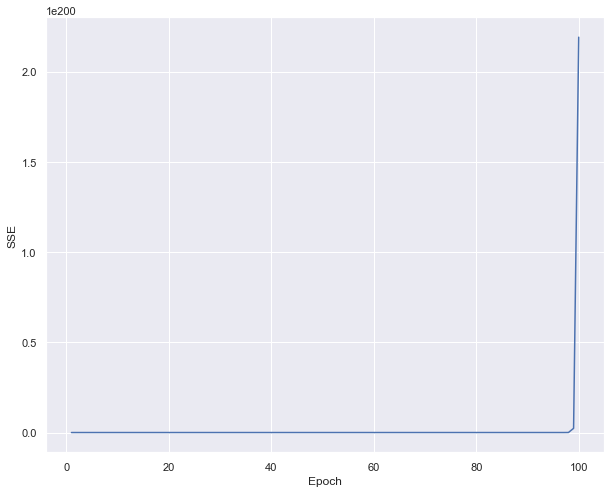

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)

plt.ylabel('SSE')#sum of squared errors
plt.xlabel('Epoch')

SUm of squared error explodes if we dont preprocess data!

# With data preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_x.fit_transform(y.reshape(-1,1)).flatten()

In [19]:
print(min(y_std))


-1.9082264141386431
2.989460074199074
[-1.5311271]
[3.54877081]


In [12]:
alpha = 0.0001
w_=np.zeros(1+X_std.shape[1])
cost_=[]
n_=100
for i in range(n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha *errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

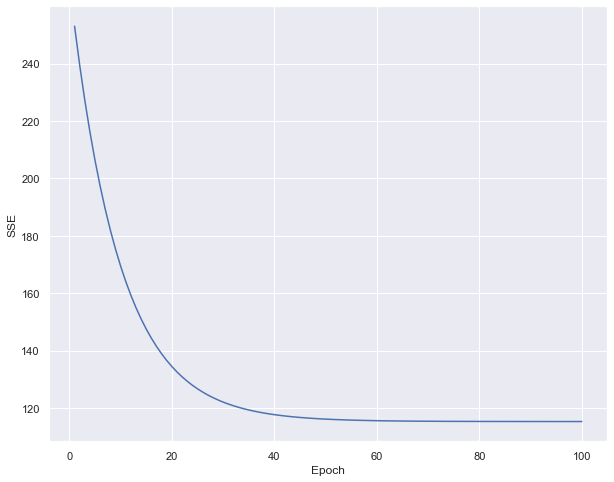

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.ylabel('SSE')#sum of squared errors
plt.xlabel('Epoch')

So with standars scaler the issue is fixed!

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <a list of 10 Patch objects>)

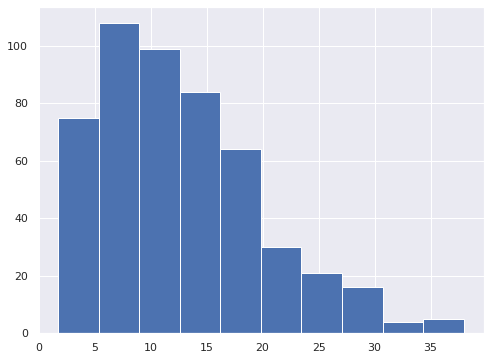

In [19]:
plt.figure(figsize=(8,6))
plt.hist(X)

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([-1.5311271 , -1.02313731, -0.51514752, -0.00715773,  0.50083206,
         1.00882185,  1.51681165,  2.02480144,  2.53279123,  3.04078102,
         3.54877081]),
 <a list of 10 Patch objects>)

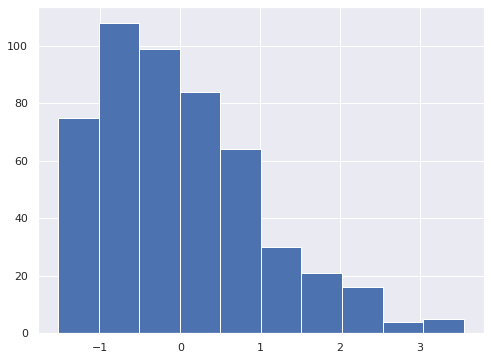

In [20]:
plt.figure(figsize=(8,6))
plt.hist(X_std)

# Data pre processing

1.Standardization/Mean Removal                                                                                                                                             
2.Min-Max /Scaling Features to a range                                                                                   
3.Normalization                                                                                              
4.Binarization                                                                              

# Standardization/Mean Removal

In [20]:
from sklearn import preprocessing

In [35]:
X_train=np.array([[1.,-1.,2.],
                [2., 0., 0.],
                [0., 1., -1.]])

In [36]:
X_scaled = preprocessing.scale(X_train)

In [39]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

([array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.])],
 array([-1.22474487, -0.96863976, -0.71253466, -0.45642955, -0.20032444,
         0.05578067,  0.31188578,  0.56799089,  0.82409599,  1.0802011 ,
         1.33630621]),
 <a list of 3 Lists of Patches objects>)

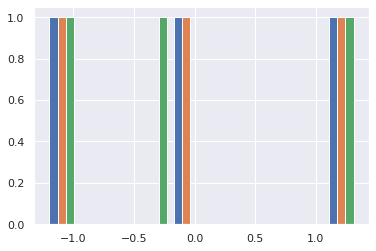

In [37]:
plt.hist(X_scaled)

In [40]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [41]:
X_scaled.var(axis=0)

array([1., 1., 1.])

In [42]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

In [43]:
X_train.var(axis=0)

array([0.66666667, 0.66666667, 1.55555556])

In [ ]:
If you are standardizing the train data you have to standardize the test data as well Thats why we use transform.

# Min-Max /Scaling Features to a range

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

In [45]:
X_train_minmax= min_max_scaler.fit_transform(X_train)

In [47]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [46]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Between zero and one!

# Now to unseen data

In [52]:
X_test = np.array([[-3., -1., 4.]])

In [53]:
X_test_minmax=min_max_scaler.transform(X_test)

In [54]:
X_test

array([[-3., -1.,  4.]])

In [55]:
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

Altough the test data was not a good choice but the algorithm could capture the numbers

In [56]:
X_test = np.array([[-3., -1., 4.],[2, 1.5, 4]])

In [57]:
X_test_minmax=min_max_scaler.transform(X_test)

In [58]:
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667],
       [ 1.        ,  1.25      ,  1.66666667]])

# MaxAbsScaler

In [62]:
X_train=np.array([[1.,-1.,2.],
                [2., 0., 0.],
                [0., 1., -1.]])

In [64]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_max_abs= max_abs_scaler.fit_transform(X_train)
X_train_max_abs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [65]:
X_test = np.array([[-3., -1., 4.],[2, 1.5, 4]])
X_test_max_abs=max_abs_scaler.transform(X_test)
X_test_max_abs

array([[-1.5, -1. ,  2. ],
       [ 1. ,  1.5,  2. ]])

# Normalization

L1  Normalization
L2 Normalization

In [66]:
X =np.array([[1.,-1.,2.],
            [2., 0., 0.],
            [0., 1., -1.]])

In [68]:
x_normalized = preprocessing.normalize(X)
x_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [70]:
normalizer = preprocessing.Normalizer().fit(X)
normalizer

Normalizer(copy=True, norm='l2')

In [71]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [72]:
normalizer.transform([[-1,1,0]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization

In [74]:
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [77]:
binarizer= preprocessing.Binarizer().fit(X)
binarizer

Binarizer(copy=True, threshold=0.0)

In [78]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [79]:
binarizer= preprocessing.Binarizer(threshold=1.1)

In [81]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

# Encoding Categorical features

# 1. Label encoder

In [82]:
source = ['Australia', 'Singapore','New Zealand','Hong Kong']

In [83]:
label_enc=preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [84]:
print('Country to code mapping:\n')
for k,v in enumerate(label_enc.classes_):
    print(v,'\t',k)

Country to code mapping:

Australia 	 0
Hong Kong 	 1
New Zealand 	 2
Singapore 	 3


In [85]:
label_enc.classes_

array(['Australia', 'Hong Kong', 'New Zealand', 'Singapore'], dtype='<U11')

In [86]:
test_data = ['New Zealand', 'Singapore','Hong Kong','Australia']

In [87]:
label_enc.transform(test_data)

array([2, 3, 1, 0])

# 2. One Hot / One-of-K Encoding

# One of K scheme

why this approach? Because the former one associatets numeric values to strings that might be misleading while using machine learning.

In [89]:
source

['Australia', 'Singapore', 'New Zealand', 'Hong Kong']

In [90]:
src

array([0, 3, 2, 1])

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
one_hot_enc=OneHotEncoder(sparse=False)
src = src.reshape(len(src),1)
one_hot= one_hot_enc.fit_transform(src)
one_hot

/home/amin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [96]:
inverse_res = label_enc.inverse_transform([np.argmax(one_hot[0,:])])
print(inverse_res)

['Australia']


In [98]:
inverse_res = label_enc.inverse_transform([np.argmax(one_hot[3,:])])
print(inverse_res)

['Hong Kong']
